# EDUTECH

## Curso de aprendizado de máquina

## Aula 2: Definição de aprendizado

## Exemplo de algoritmo

### Cálculo da raiz quadrada de um número n (caso especial em que n é quadrado perfeito)

#### Algoritmo

1. Crie uma lista com os n primeiros números ímpares ordenados;
2. Inicie um contador com o número zero;
3. Enquanto n for positivo, subtraia de n um elemento da lista (na sequência) e adicione um ao contador;
4. Retorne o contador.

#### Pseudo-código

Entrada: n
    ímpares = (1,2,3,...,n) * 2 - 1 
    i = 0 

    Enquanto n > 0 faça:
        n = n - ímpares(i)
        i = i + 1
Saída: i

#### Código em Python

In [56]:
def raiz_perfeita(n):
    impares = [2*i + 1 for i in range(n)]
    i = 0
    while(n > 0):
        n = n - impares[i]
        i = i + 1
    return(i)

n = 100
print("A raiz de %d é %d"% (n, raiz_perfeita(n)))

A raiz de 100 é 10


#### Código simplificado e adaptado para mostrar a parte inteira da raiz de qualquer número

In [55]:
def raiz_inteira(n, i = 1):
    while(i*i < n): i = i + 1
    if(i*i == n): return(i)
    else: return(i-1)

n = 90
print("A parte inteira da raiz de %d é %d"% (n, raiz_inteira(n)))

A parte inteira da raiz de 90 é 9


#### Caso geral para cálculo da raiz quadrada

In [54]:
def raiz(n):
    aprox = float(raiz_inteira(n))
    for _ in range(100):
        aprox = (n/aprox + aprox)/2
    return(aprox)

n = 90
print("A raiz de %.2f é %.2f"% (n, raiz(n)))

A raiz de 90.00 é 9.49


## Sistema baseado em conhecimento: IMC

IMC (índice de massa corporal) é um método para medir a gordura corporal. Desenvolvido na Bélgica pelo estatístico e antropometrista, Adolphe Quételet, está métrica define-se pela dividisão do peso (p) do indivíduo, medido em quilos pelo quadrado de sua altura (h) medida em metros.

$$ IMC = \frac{p}{h^2}$$

Através desta medida, é feita a classificação dos indivíduos de acordo com a tabela:



| IMC       | Classificação      |Sigla|
|:---------:|:------------------:|:---:|
| < 18.5    | Abaixo do Peso     | AP  |
| 18.5–24.9 | Peso normal        | PN  |
| 25.0–29.9 | Sobrepeso          | SP  |
| 30.0–34.9 | Obesidade grau I   | O1  |
| 35.0–39.9 | Obesidade grau II  | O2  |
| ≥ 40.0    | Obesidade grau III | O3  |

#### Código em Python para calcular o IMC

In [140]:
def imc(p,h):
    return(h/p**2)

def classificar(IMC):    
    if(IMC < 18.5): cls = "AP"
    elif(IMC < 25): cls = "PN"
    elif(IMC < 30): cls = "SP"
    elif(IMC < 35): cls = "O1"
    elif(IMC < 40): cls = "O2"
    else: cls = "O3"

    return(cls)

peso = 75
altura = 1.75
print("O IMC de uma pessoa com %.2fm e %dKg é %.2f, classificada como %s"% \
      (altura, peso, imc(altura,peso), classificar(imc(altura,peso))))

O IMC de uma pessoa com 1.75m e 75Kg é 24.49, classificada como PN


## Construindo um dataset de alturas e pesos

In [287]:
import numpy as np
import pandas as pd

def gerar_dados(n = 100):
    # Definindo uma população com média 1.7 e desvio padrão 0.1 para a medida de altura
    alturas = np.random.normal(loc = 1.7, scale = 0.1, size=n)
    alturas.resize(n,1)
    # Definindo o peso médio para cada altura de acordo com o IMC normal
    peso_medio = alturas**2 * 25
    # Adicionando um ruído (0,10) nos pesos, para simular diferentes IMCs
    ruido = np.random.normal(scale = 15, size = n)
    ruido.resize(n,1)
    pesos = ruido + peso_medio

    # Criando o dataset
    dados = pd.DataFrame(np.concatenate((alturas, pesos),axis=1))
    dados.columns = ["Altura", "Peso"]
    dados["IMC"] = pesos/alturas**2
    dados["Classificacao"] = dados["IMC"].apply(classificar)

    return(dados)

massa_corporal = gerar_dados(100)
print("Dataset Massa Corporal (gerado artificialmente):")

massa_corporal.describe()

Dataset Massa Corporal (gerado artificialmente):


,Altura,Peso,IMC
count,100.000000,100.000000,100.000000
mean,1.720877,73.240503,24.614842
std,0.108508,17.993660,5.445987
min,1.479663,7.816478,3.570141
25%,1.648400,62.594999,21.693601
50%,1.725054,73.813416,24.493905
75%,1.799676,83.756578,28.243956
max,2.069614,113.457678,40.798227


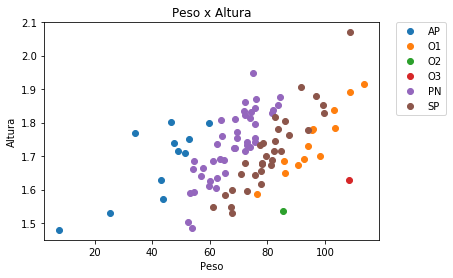

In [288]:
import matplotlib.pyplot as plt

def plotar_dados(dados):
    groups = dados.groupby('Classificacao')

    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group.Peso, group.Altura, marker='o', linestyle='', label=name)

    plt.title("Peso x Altura")
    plt.xlabel("Peso")
    plt.ylabel("Altura")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

plotar_dados(massa_corporal)

# Aumentando o conhecimento

Em um sistema baseado em aprendizado, a quantidade de dados é fundamental para melhorar a performance. 
Para classificar adequadamente, é preciso entender onde estão as fronteiras. 
Nos exemplos abaixo é possível observar que quanto maior a quantidade de dados, melhor a definição da fronteira.

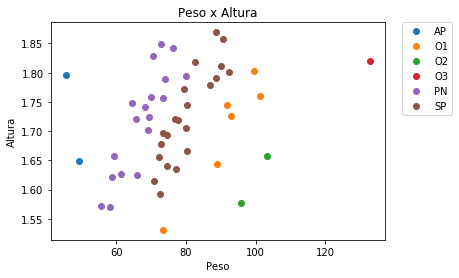

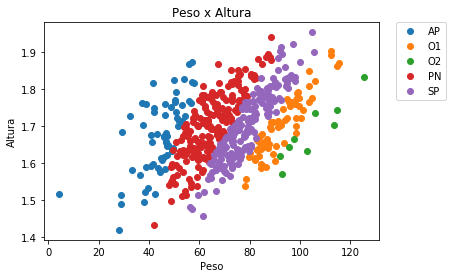

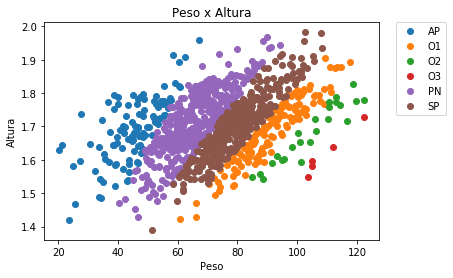

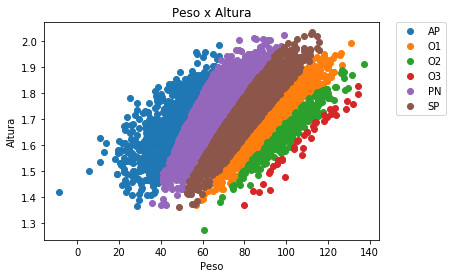

In [291]:
plotar_dados(gerar_dados(50))
plotar_dados(gerar_dados(500))
plotar_dados(gerar_dados(1000))
plotar_dados(gerar_dados(10000))

## Sistema baseado em aprendizado

Em um sistema baseado em aprendizado é possível classificar (predizer, agrupar, ...) a partir do conhecimento armazenado nos dados. Um exemplo simples pode ser apresentado com algoritmo 1NN, que será apresentado no decorrer do curso. Neste algoritmo, classificamos os dados de acordo com o dados que mais se assemelha ao novo exemplo. Isto é feito através de uma função de distância.

$$ dist(x,y) = \sqrt{\sum_{i=1}^{d}{(x_i - y_i)}}$$

onde d é a dimensão dos elementos x e y.

In [285]:
class Pessoa(object):
    def __init__(self, peso, altura):
        self.peso = peso
        self.altura = altura
        self.imc = peso/altura**2


class NN(object):
    def __init__(self, dataframe):
        self.df = dataframe
    
    def classificar(self, pessoa):
        self.df['Distancia'] = abs(self.df['IMC'] - pessoa.imc)
        sorted_df = self.df.sort_values(by='Distancia')
        return(sorted_df['Classificacao'].values[0])

pessoa = Pessoa(peso = 75, altura = 1.75)
nn = NN(massa_corporal)

print("Classificação pelo sistema baseado em conhecimento: %s "% (nn.classificar(pessoa)))
print("Classificação pelo sistema baseado em aprendizado: %s"% (classificar(pessoa.imc)))

Classificação pelo sistema baseado em conhecimento: PN 
Classificação pelo sistema baseado em aprendizado: PN
